# Contents


MACHINE LEARNING FOR RENTALS
- Data Imports
- Data cleaning
- Date exploration 
- Text modeling
- Feature engineering / Encoding / Msd feature / Lag features
- Modeling
- Confidence intervals
- Evaluation
- Streamlit code

                "         _ _\n"
                "        ( Y )\n"
                "         \\ /\n"
                "          \\         /^\\\n"  
                "            )       //^\\\n"
                "         (         //   \\\n"
                "           )      //     \\\n"
                "          __     //       \\\n"
                "         |=^|   //    _    \\\n"
                "       __|= |__//    (+)    \\\n"
                "      /LLLLLLL//      ~      \\\n"
                "     /LLLLLLL//               \\\n"
                "    /LLLLLLL//                 \\\n"
                "   /LLLLLLL//  |~[|]~| |~[|]~|  \\\n"
                "   ^| [|] //   | [|] | | [|] |   \\\n"
                "    | [|] ^|   |_[|]_| |_[|]_|   |^\n"
                " ___|______|                     |\n"
                "/LLLLLLLLLL|_____________________|\n"
                "/LLLLLLLLLLL/LLLLLLLLLLLLLLLLLLLLLL\\\n"
                "/LLLLLLLLLLL/LLLLLLLLLLLLLLLLLLLLLLLL\\\n"
                "^||^^^^^^^^/LLLLLLLLLLLLLLLLLLLLLLLLLL\\\n"
                " || |~[|]~|^^||^^^^^^^^^^||^|~[|]~|^||^^\n"
                " || | [|] |  ||  |~~~~|  || | [|] | ||\n"
                " || |_[|]_|  ||  | [] |  || |_[|]_| ||\n"
                " ||__________||  |   o|  ||_________||\n"
                ".'||][][][][][|| | [] |  ||[][][][][||.'.\n"
                ".'||[][][][][]||_-`----'-_||][][][][]||'.\"\n"
                ".'(')^(.)(').( )'^@/-- -- - --\\@( )'(.),( ).(').\n"

In [1]:
#Imports
import warnings
# Turn off all warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.cluster import KMeans

#text modeling
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from imblearn.under_sampling import RandomUnderSampler

#Text Processing
import regex as re
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from imblearn.under_sampling import RandomUnderSampler

# Import MSD data

In [84]:
# Import
msddf_raw = pd.read_csv('/Users/lou/Desktop/projects/Capstone/capstone data/DOIA 2223-2936 Bond Data Auckland Region - Lucas Hanson (1).csv')
msddf = pd.read_csv('/Users/lou/Desktop/projects/Capstone/capstone data/DOIA 2223-2936 Bond Data Auckland Region - Lucas Hanson (1).csv')

In [85]:
# drop suburbs with less than 50 rows

suburb_counts = msddf['Suburb'].value_counts()
suburbs_to_drop = suburb_counts[suburb_counts < 50].index

msddf = msddf[~msddf['Suburb'].isin(suburbs_to_drop)]

In [86]:
#rename column
msddf = msddf.rename(columns = {' Weekly Rent ': 'price'})

In [89]:
#drop annoying values
msddf = msddf.drop(msddf[msddf['price'] == ' -   '].index)
msddf = msddf.drop(msddf[msddf['price'] == '-'].index)

In [90]:
# convert prices to float
msddf['price'] = msddf['price'].str.replace('$', '')  # Remove the dollar sign
msddf['price'] = msddf['price'].str.replace(',', '')  # Remove commas
msddf['price'] = msddf['price'].str.strip()  # Remove leading/trailing whitespaces

msddf['price'] = msddf['price'].astype(float)  # Convert to float

In [91]:
#drop nulls
msddf = msddf.dropna()

In [92]:
# drop bedrooms that arn't 1-9
msddf['Bedrooms'] = msddf['Bedrooms'].astype(int)  # Convert 'bedroom' column to integer

valid_bedrooms = [1, 2, 3, 4, 5, 6, 7, 8, 9]
msddf = msddf[msddf['Bedrooms'].isin(valid_bedrooms)]  # Keep rows with valid bedroom values

# Visualise MSD data

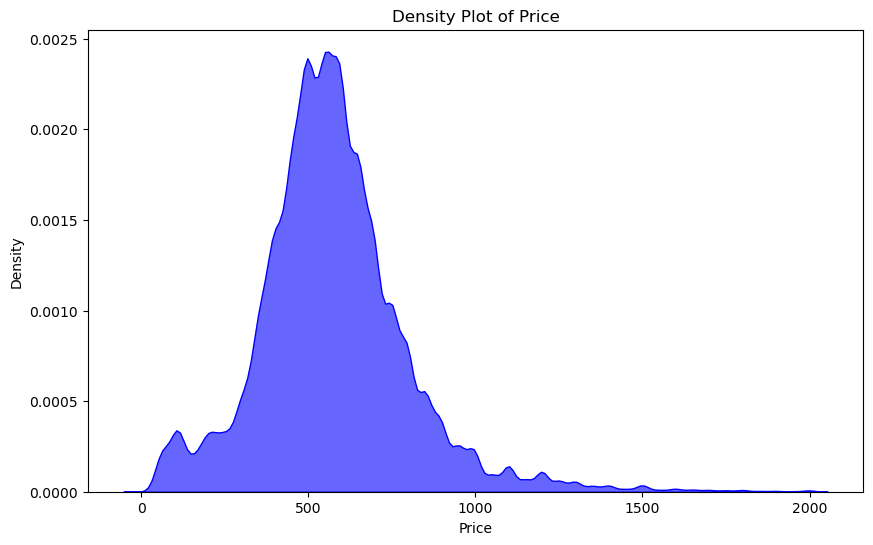

In [93]:
# Plot price distribution for houses under $2000
filtered_df = msddf[msddf['price'] <= 2000]

plt.figure(figsize=(10, 6))
sns.kdeplot(data=filtered_df['price'], fill=True, color='blue', alpha=0.6)

# Add labels and title
plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Density Plot of Price')

# Display the plot
plt.show()

# Most expensive suburbs

In [94]:
# get mean price of suburb and top 30 most expensive suburbs
mean_price_by_suburb = msddf.groupby('Suburb')['price'].mean()
top_30_expensive_suburbs = mean_price_by_suburb.sort_values(ascending=False).head(30)

print("Mean price by suburb:")
print(mean_price_by_suburb)

print("\nTop 30 most expensive suburbs:")
print(top_30_expensive_suburbs)

Mean price by suburb:
Suburb
Albany            555.588479
Albany Heights    730.542208
Alfriston         585.441860
Algies Bay        499.285714
Ararimu           539.300000
                     ...    
Whenuapai         678.044749
Whenuapai West    678.849624
Whitford          719.976852
Windsor Park      679.176667
Wiri              418.575137
Name: price, Length: 290, dtype: float64

Top 30 most expensive suburbs:
Suburb
Long Bay              895.743478
Westmere              879.198686
Ponsonby              867.339299
Ponsonby East         859.872881
Herne Bay             838.532318
St Heliers            816.659283
Remuera               811.524859
Arch Hill             806.375622
Campbells Bay         802.848980
Orakei                794.130769
Stanley Point         784.222222
Castor Bay            777.459854
Hauraki               776.991745
Drury East            775.000000
Glendowie             770.734069
South Epsom           768.759813
Dairy Flat-Redvale    761.645161
Kohimarama 

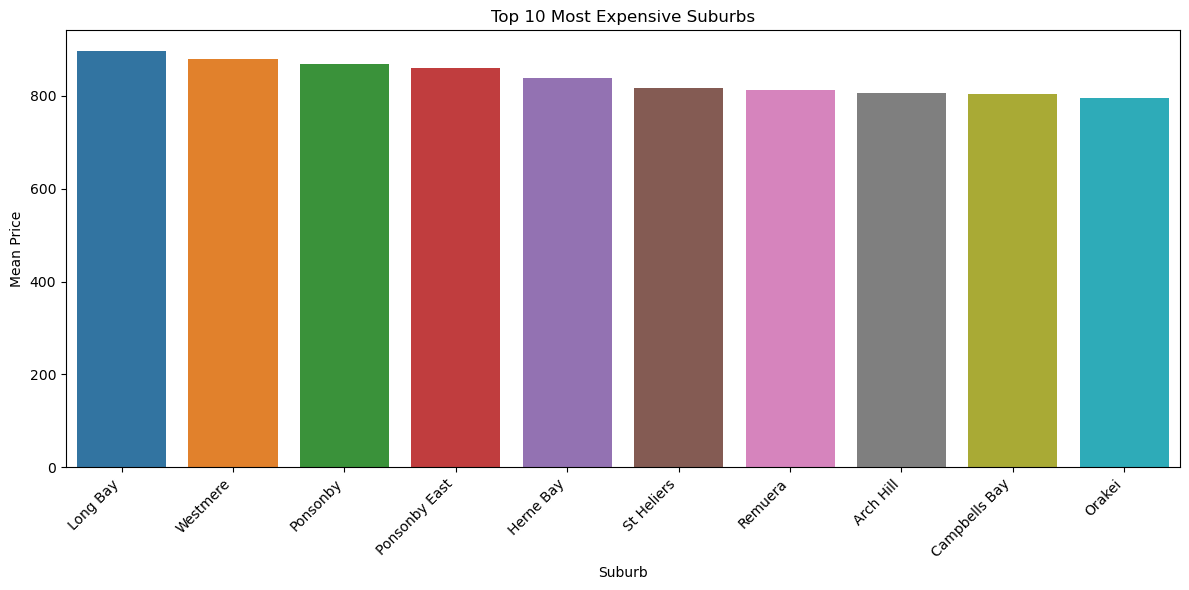

In [95]:
#plot top ten most expensive suburbs
top_10_expensive_suburbs = top_30_expensive_suburbs.head(10)

# Plotting the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_expensive_suburbs.index, y=top_10_expensive_suburbs.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Suburb')
plt.ylabel('Mean Price')
plt.title('Top 10 Most Expensive Suburbs')
plt.tight_layout()
plt.show()


# Import Realestate.co data

In [2]:
# Import
df_raw = pd.read_csv('/Users/lou/Desktop/projects/Capstone/capstone data/RentalData.csv')
df = pd.read_csv('/Users/lou/Desktop/projects/Capstone/capstone data/RentalData.csv')

In [6]:
df.head()

,Publish Date,Floor Area,Ensuite,Full Bathroom,Pets Allowed,Has Current Package,Price,Bedroom Count,Property Type,Suburb,District,Region,Title
0,19/01/2021 9:48,NaN,0,3,0,0,900,5,House,Glenfield,North Shore City,Auckland,Perfect student accommodation
1,19/01/2021 9:48,NaN,0,1,0,0,385,2,Apartment,Auckland Central,Auckland City,Auckland,Modern 2-bedroom Furnished Apartment in Altitu...
2,1/03/2021 15:36,NaN,0,1,0,0,650,4,Townhouse,Greenhithe,North Shore City,Auckland,"4 Bedroom, 1.5 Bathroom Townhouse"
3,11/02/2021 11:20,NaN,0,2,1,0,785,4,House,Greenhithe,North Shore City,Auckland,"Te Wharau Drive, Greenhithe"
4,10/02/2021 1:09,NaN,0,3,0,0,850,4,House,Albany,North Shore City,Auckland,Modern family home in Unsworth Heights


In [100]:
# Filter the DataFrame where Region is 'Auckland' and get unique District values
unique_districts_in_auckland = df_raw[df_raw['Region'] == 'Auckland']['District'].unique()

print(unique_districts_in_auckland)

['North Shore City' 'Auckland City' 'Waitakere City' 'Rodney'
 'Manukau City' 'Franklin' 'Papakura' 'Waiheke Island']


# data cleaning

In [3]:
# Remove the time of day element from 'Publish Date' column
df['Publish Date'] = df['Publish Date'].str.split(' ').str[0]

# Display the updated DataFrame
df.head()

,Publish Date,Floor Area,Ensuite,Full Bathroom,Pets Allowed,Has Current Package,Price,Bedroom Count,Property Type,Suburb,District,Region,Title
0,19/01/2021,NaN,0,3,0,0,900,5,House,Glenfield,North Shore City,Auckland,Perfect student accommodation
1,19/01/2021,NaN,0,1,0,0,385,2,Apartment,Auckland Central,Auckland City,Auckland,Modern 2-bedroom Furnished Apartment in Altitu...
2,1/03/2021,NaN,0,1,0,0,650,4,Townhouse,Greenhithe,North Shore City,Auckland,"4 Bedroom, 1.5 Bathroom Townhouse"
3,11/02/2021,NaN,0,2,1,0,785,4,House,Greenhithe,North Shore City,Auckland,"Te Wharau Drive, Greenhithe"
4,10/02/2021,NaN,0,3,0,0,850,4,House,Albany,North Shore City,Auckland,Modern family home in Unsworth Heights


In [5]:
df.columns

Index(['Publish Date', 'Floor Area', 'Ensuite', 'Full Bathroom',
       'Pets Allowed', 'Has Current Package', 'Price', 'Bedroom Count',
       'Property Type', 'Suburb', 'District', 'Region', 'Title'],
      dtype='object')

In [4]:
# Convert 'Publish Date' column to datetime format, handling unparseable dates as NaT
df['Publish Date'] = pd.to_datetime(df['Publish Date'], format='%d/%m/%Y', errors='coerce')




In [5]:
# Drop the rows with NaT values in the 'Publish Date' column
df.dropna(subset=['Publish Date'], inplace=True)


In [6]:
# drop nulls in titles
df.dropna(subset=['Title'], inplace=True)

In [7]:
# select all listings from Aucklan

df = df.loc[df['Region'] == 'Auckland']

In [9]:
#drop unwanted listing types

df = df[(df['Property Type'] != 'Carpark') & 
        (df['Property Type'] != 'Retirement Living') & 
        (df['Property Type'] != 'Holiday Rental') & 
        (df['Property Type'] != 'Section Res')]


In [10]:
# drop listings with 0 bedrooms
df = df[df['Bedroom Count'] != 0]


In [11]:
# Drop rows where 'Bathroom Ensuites' > 4, 'BathroomFull' > 4, and 'No Of Bedrooms' > 7
df = df[(df['Ensuite'] <= 4) & (df['Full Bathroom'] <= 4) & (df['Bedroom Count'] <= 7)]



# Creating an expensive suburb feature from msd data


In [96]:
# Output a list of the top 30 suburbs in 'msddf'
top_30_suburbs = top_30_expensive_suburbs.index.tolist()
print("Top 30 suburbs in 'msddf':")
print(top_30_suburbs)


Top 30 suburbs in 'msddf':
['Long Bay', 'Westmere', 'Ponsonby', 'Ponsonby East', 'Herne Bay', 'St Heliers', 'Remuera', 'Arch Hill', 'Campbells Bay', 'Orakei', 'Stanley Point', 'Castor Bay', 'Hauraki', 'Drury East', 'Glendowie', 'South Epsom', 'Dairy Flat-Redvale', 'Kohimarama', 'Freemans Bay', 'Okura', 'Silverdale North', 'St Marys Bay', 'Coatesville', 'Karaka Harbour', 'Stonefields', 'Parnell', 'Murrays Bay', 'Dannemora', 'Silverdale', 'Mission Bay']


In [97]:
# Clean and standardize the suburb names in 'msddf'
df['Cleaned_Suburb'] = df['Suburb'].str.strip().str.lower()

# Create a list of the top 30 most expensive suburbs in 'msddf'
expensive_suburbs_msddf = ['long bay', 'ponsonby', 'westmere', 'arch hill', 'st heliers', 'remuera', 'campbells bay', 'stanley point', 'orakei', 'castor bay', 'drury east', 'ponsonby east', 'dairy flat-redvale', 'glendowie', 'silverdale north', 'kohimarama', 'herne bay', 'karaka harbour', 'stonefields', 'okura', 'south epsom', 'hauraki', 'murrays bay', 'dannemora', 'karaka', 'silverdale', 'milldale', 'albany heights', 'coatesville', 'dairy flat']

# Find matching suburbs in 'df'
matching_suburbs = list(set(df['Cleaned_Suburb']).intersection(set(expensive_suburbs_msddf)))

# Display the matching suburbs
print(matching_suburbs)

['ponsonby', 'murrays bay', 'karaka', 'dannemora', 'glendowie', 'okura', 'westmere', 'silverdale', 'hauraki', 'coatesville', 'orakei', 'long bay', 'stanley point', 'dairy flat', 'kohimarama', 'castor bay', 'albany heights', 'herne bay', 'remuera', 'campbells bay']


In [98]:
# Create a list of the top 30 most expensive suburbs in 'msddf'
expensive_suburbs_msddf = ['Long Bay', 'Ponsonby', 'Westmere', 'Arch Hill', 'St Heliers', 'Remuera', 'Campbells Bay', 'Stanley Point', 'Orakei', 'Castor Bay', 'Drury East', 'Ponsonby East', 'Dairy Flat-Redvale', 'Glendowie', 'Silverdale North', 'Kohimarama', 'Herne Bay', 'Karaka Harbour', 'Stonefields', 'Okura', 'South Epsom', 'Hauraki', 'Murrays Bay', 'Dannemora', 'Karaka', 'Silverdale', 'Milldale', 'Albany Heights', 'Coatesville', 'Dairy Flat']

# Create the 'Expensive_Suburb_Flag' column in 'df' and assign the flag
df['Expensive_Suburb_Flag'] = df['Suburb'].isin(expensive_suburbs_msddf).astype(int)

# Verify the changes
print(df[['Suburb', 'Expensive_Suburb_Flag']])


                 Suburb  Expensive_Suburb_Flag
0             Glenfield                      0
1      Auckland Central                      0
2            Greenhithe                      0
3            Greenhithe                      0
4                Albany                      0
...                 ...                    ...
68315            Orakei                      1
68316       Hobsonville                      0
68317       Three Kings                      0
68318           Remuera                      1
68319        Browns Bay                      0

[67516 rows x 2 columns]


# Exploring text column 'Title'

[nltk_data] Downloading package punkt to /Users/lou/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/lou/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


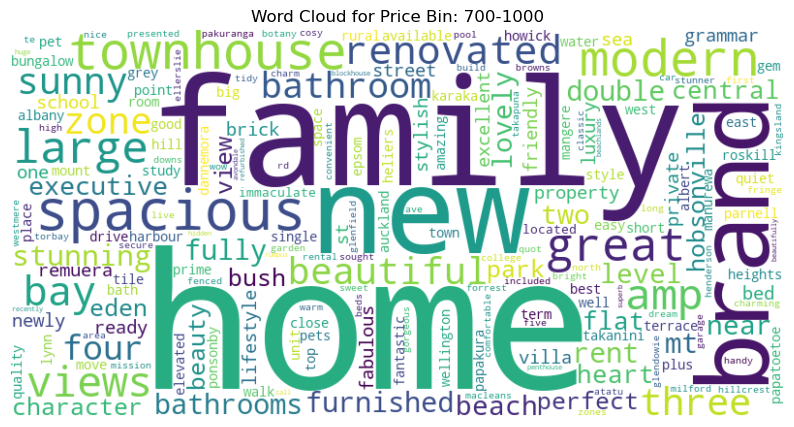

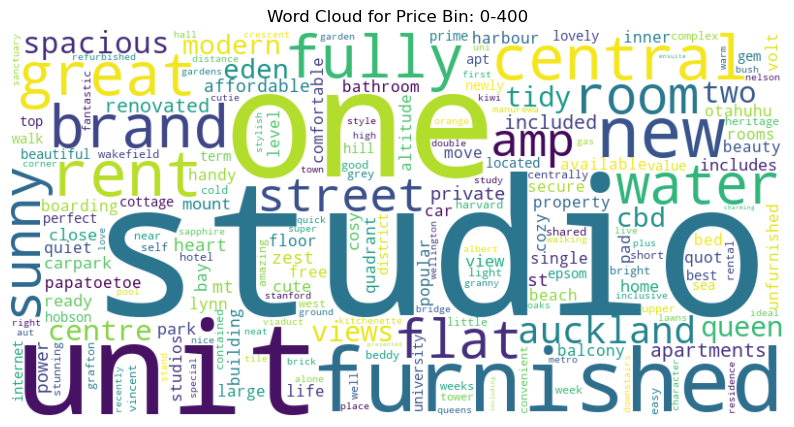

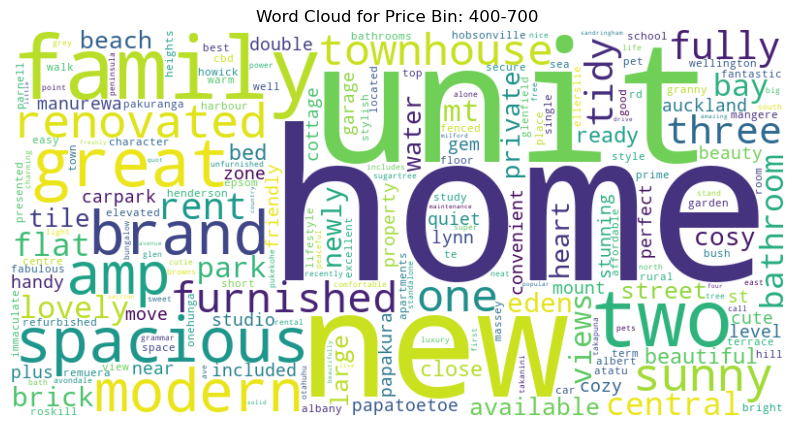

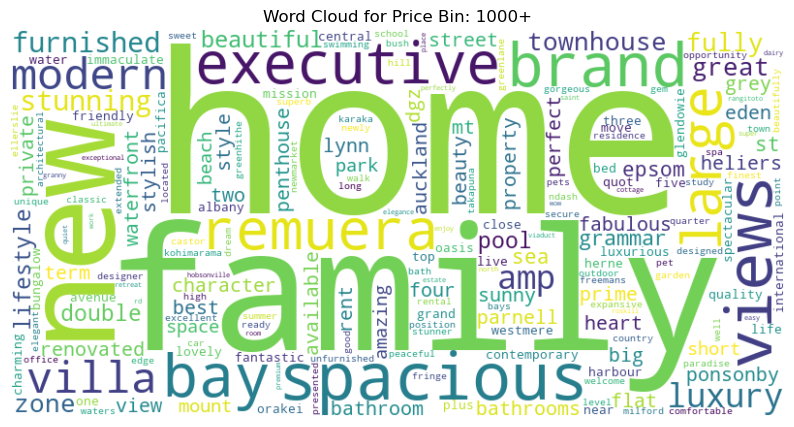

In [17]:

nltk.download('punkt')
nltk.download('stopwords')

# Custom stop word list
custom_stop_words = ['bedroom', 'bedrooms','location','house', 'living', 'road','apartment','city']  

# Preprocessing function to clean and tokenize the 'Title' column
def preprocess_title(title, stop_words):
    # Convert to lowercase
    title = title.lower()
    # Tokenize the text
    words = word_tokenize(title)
    # Remove stopwords
    stop_words = set(stopwords.words('english')) | set(stop_words)
    words = [word for word in words if word.isalpha() and word not in stop_words]
    return words

# Apply preprocessing to 'Title' column
df['Title'] = df['Title'].apply(lambda x: preprocess_title(x, custom_stop_words))

# Function to categorize prices into bins
def categorize_price(price):
    if price < 400:
        return '0-400'
    elif price < 700:
        return '400-700'
    elif price < 1000:
        return '700-1000'
    else:
        return '1000+'

# Apply price binning
df['Price_Bin'] = df['Price'].apply(categorize_price)

# Count the occurrence of words for each price bin
word_counts_by_bin = {}
for price_bin in df['Price_Bin'].unique():
    words = df[df['Price_Bin'] == price_bin]['Title'].sum()
    word_counts_by_bin[price_bin] = nltk.FreqDist(words)

# Create word clouds for each price bin
for price_bin, word_count in word_counts_by_bin.items():
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_count)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Price Bin: {price_bin}')
    plt.axis('off')
    plt.show()


In [35]:
# Count the occurrence of words for each price bin
word_counts_by_bin = {}
for price_bin in df['Price_Bin'].unique():
    words = df[df['Price_Bin'] == price_bin]['Title'].sum()
    word_counts_by_bin[price_bin] = nltk.FreqDist(words)

# Get the top ten most common words for each price bin
top_ten_common_words_by_bin = {}
for price_bin, word_count in word_counts_by_bin.items():
    top_ten_common_words = word_count.most_common(20)
    top_ten_common_words_by_bin[price_bin] = [word for word, count in top_ten_common_words]

# Find unique features for each bin
unique_features_by_bin = {}
for price_bin, top_words in top_ten_common_words_by_bin.items():
    unique_features = []
    for other_price_bin, other_words in top_ten_common_words_by_bin.items():
        if price_bin != other_price_bin:
            unique_features.extend([word for word in top_words if word not in other_words])
    unique_features_by_bin[price_bin] = list(set(unique_features))

# Print the unique features for each bin
for price_bin, unique_features in unique_features_by_bin.items():
    print(f"Unique features for price bin '{price_bin}': {unique_features}")

Unique features for price bin '700-1000': ['stunning', 'bathroom', 'renovated', 'four', 'modern', 'three', 'sunny', 'family', 'large', 'beautiful', 'bay', 'views', 'zone', 'home', 'townhouse']
Unique features for price bin '0-400': ['two', 'furnished', 'studio', 'auckland', 'unit', 'sunny', 'water', 'flat', 'centre', 'one', 'room', 'street', 'fully', 'rent', 'central']
Unique features for price bin '400-700': ['renovated', 'two', 'furnished', 'home', 'modern', 'three', 'unit', 'sunny', 'family', 'one', 'tidy', 'fully', 'rent', 'townhouse', 'central']
Unique features for price bin '1000+': ['stunning', 'villa', 'furnished', 'modern', 'executive', 'fully', 'family', 'large', 'bay', 'views', 'zone', 'remuera', 'luxury', 'home', 'townhouse']


In [12]:
# Calculate the mean price for each unique value of 'Bedroom Count'
mean_price_by_bedroom_count = df.groupby('Bedroom Count')['Price'].mean()

# Display the mean price for each bedroom count
print(mean_price_by_bedroom_count)


Bedroom Count
1     434.536763
2     567.521042
3     696.687065
4     862.621817
5    1040.149388
6    1158.583510
7    1256.126761
Name: Price, dtype: float64


In [13]:
# Calculate the upper quartile price for each unique value of 'Bedroom Count'
upper_quartile_price_by_bedroom_count = df.groupby('Bedroom Count')['Price'].quantile(0.85)

# Display the upper quartile price for each bedroom count
print(upper_quartile_price_by_bedroom_count)

Bedroom Count
1     530.0
2     650.0
3     795.0
4    1000.0
5    1280.0
6    1400.0
7    1547.5
Name: Price, dtype: float64


# Creating a target for a text model 'Premium property'

In [14]:
# Calculate the 90th percentile price for each unique value of 'Bedroom Count'
percentile_90_price_by_bedroom_count = df.groupby('Bedroom Count')['Price'].transform(lambda x: x.quantile(0.9))

# Create the 'premium_property' column based on the condition
df['premium_property'] = (df['Price'] > percentile_90_price_by_bedroom_count).astype(int)

# Display the DataFrame with the new 'premium_property' column
df.head()

,Publish Date,Floor Area,Ensuite,Full Bathroom,Pets Allowed,Has Current Package,Price,Bedroom Count,Property Type,Suburb,District,Region,Title,premium_property
0,2021-01-19,NaN,0,3,0,0,900,5,House,Glenfield,North Shore City,Auckland,Perfect student accommodation,0
1,2021-01-19,NaN,0,1,0,0,385,2,Apartment,Auckland Central,Auckland City,Auckland,Modern 2-bedroom Furnished Apartment in Altitu...,0
2,2021-03-01,NaN,0,1,0,0,650,4,Townhouse,Greenhithe,North Shore City,Auckland,"4 Bedroom, 1.5 Bathroom Townhouse",0
3,2021-02-11,NaN,0,2,1,0,785,4,House,Greenhithe,North Shore City,Auckland,"Te Wharau Drive, Greenhithe",0
4,2021-02-10,NaN,0,3,0,0,850,4,House,Albany,North Shore City,Auckland,Modern family home in Unsworth Heights,0


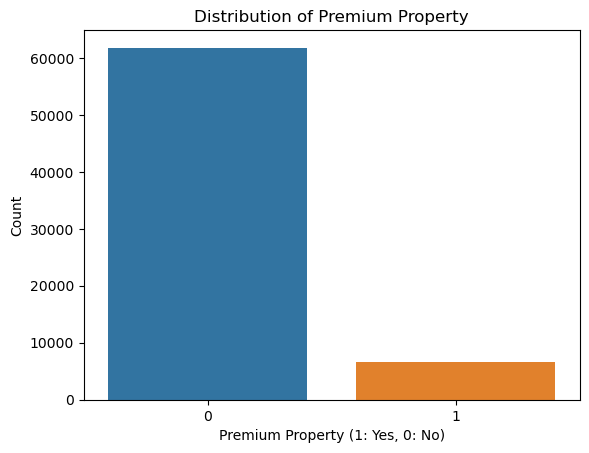

In [23]:
# Create the bar chart
sns.countplot(data=df, x='premium_property')



# Set plot labels and title
plt.xlabel('Premium Property (1: Yes, 0: No)')
plt.ylabel('Count')
plt.title('Distribution of Premium Property')

# Show the plot
plt.show()


# Niave bayes model

In [18]:
# Create the CountVectorizer instance
vectorizer = CountVectorizer()

# Fit and transform the 'Title' column to get the count-vectorized text
X = vectorizer.fit_transform(df['Title'].apply(' '.join))  # Concatenate words in each row for vectorization

# Get the target vector 'y'
y = df['premium_property']


In [19]:
# train-test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply undersampling 
undersampler = RandomUnderSampler(random_state=42)
X_train_balanced, y_train_balanced = undersampler.fit_resample(X_train, y_train)

# Naive Bayes model (MultinomialNB)
naive_bayes_model = MultinomialNB()

# Train the model on the balanced training data
naive_bayes_model.fit(X_train_balanced, y_train_balanced)

# Predict on the test data
y_pred = naive_bayes_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Display the model's performance metrics
print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)


Accuracy: 0.765442037470726

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.77      0.86     12378
           1       0.25      0.76      0.38      1286

    accuracy                           0.77     13664
   macro avg       0.61      0.76      0.62     13664
weighted avg       0.90      0.77      0.81     13664



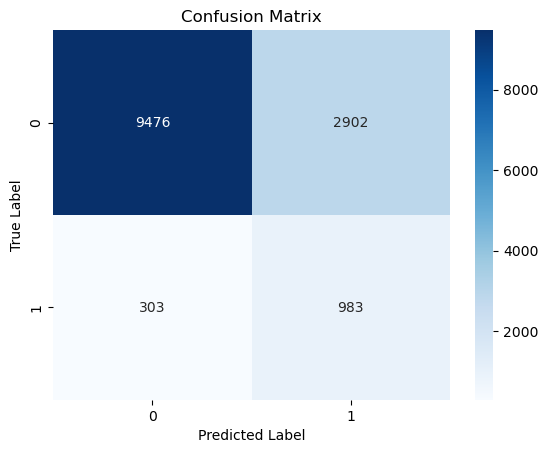

In [26]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using Seaborn's heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Extract priors to use for a feature to flag premium properties

In [20]:
# Get the feature names from the CountVectorizer
feature_names = vectorizer.get_feature_names_out()

# Get the log probabilities of the features (words) for each class
log_probabilities = naive_bayes_model.feature_log_prob_

# Get the indices of the top 10 words with highest log probabilities for class 1 (premium_property=1)
top_10_words_indices = log_probabilities[1].argsort()[-8:][::-1]
top_10_words = [feature_names[i] for i in top_10_words_indices]

# Display the top 10 words
print("Top 10 most informative words for class 1 (premium_property=1):")
print(top_10_words)

Top 10 most informative words for class 1 (premium_property=1):
['home', 'furnished', 'new', 'views', 'family', 'fully', 'brand', 'luxury']


In [21]:
# Find the indices of misclassified rows with premium_property=1
misclassified_indices = y_test[(y_test != y_pred) & (y_test == 1)].index

# Extract misclassified rows into a new DataFrame
misclassified_df = df.loc[misclassified_indices]

# Display the misclassified rows DataFrame
misclassified_df.head(30)


,Publish Date,Floor Area,Ensuite,Full Bathroom,Pets Allowed,Has Current Package,Price,Bedroom Count,Property Type,Suburb,District,Region,Title,premium_property,Price_Bin
126603,2023-03-09,NaN,0,1,0,0,715,2,House,Parnell,Auckland City,Auckland,"[light, amp, bright, st, georges, bay, rd]",1,700-1000
59342,2022-01-18,NaN,1,2,0,0,700,2,Apartment,Auckland Central,Auckland City,Auckland,[],1,700-1000
57719,2022-01-10,NaN,0,2,1,0,895,3,House,Mount Eden,Auckland City,Auckland,"[plenty, room, whole, family]",1,700-1000
123281,2023-02-16,NaN,0,3,0,0,700,2,House,Mount Wellington,Auckland City,Auckland,"[fronting, almost, new, townhouse]",1,700-1000
122957,2023-02-15,NaN,0,1,0,0,730,1,House,Sandringham,Auckland City,Auckland,"[newly, build, bathroom, full, kitchen]",1,700-1000
123270,2023-02-16,NaN,0,2,0,0,1040,3,House,Orakei,Auckland City,Auckland,"[beddy, family, home, orakei]",1,1000+
122452,2023-02-10,NaN,0,2,0,0,830,2,Apartment,Auckland Central,Auckland City,Auckland,"[two, two, bathroom, beautiful, ant]",1,700-1000
11746,2021-03-03,NaN,1,2,0,0,985,2,Apartment,Auckland Central,Auckland City,Auckland,[supreme],1,700-1000
126054,2023-03-06,219.0,1,2,0,0,995,3,Townhouse,Mission Bay,Auckland City,Auckland,"[modern, family, home]",1,700-1000
36314,2021-08-02,NaN,0,2,0,0,700,2,Townhouse,Epsom,Auckland City,Auckland,"[spacious, two, townhouse]",1,700-1000


# creating premium text feature

In [22]:
# Function to check if any of the top words appear in the tokenized Title
def has_premium_word(title_tokens):
    return any(word in title_tokens for word in top_10_words)

# Create the new feature 'premium properties text'
df['premium_properties_text'] = df['Title'].apply(has_premium_word).astype(int)

# Display the DataFrame with the new feature
df.head(10)

,Publish Date,Floor Area,Ensuite,Full Bathroom,Pets Allowed,Has Current Package,Price,Bedroom Count,Property Type,Suburb,District,Region,Title,premium_property,Price_Bin,premium_properties_text
0,2021-01-19,NaN,0,3,0,0,900,5,House,Glenfield,North Shore City,Auckland,"[perfect, student, accommodation]",0,700-1000,0
1,2021-01-19,NaN,0,1,0,0,385,2,Apartment,Auckland Central,Auckland City,Auckland,"[modern, furnished, altitude, free, hot, cold,...",0,0-400,1
2,2021-03-01,NaN,0,1,0,0,650,4,Townhouse,Greenhithe,North Shore City,Auckland,"[bathroom, townhouse]",0,400-700,0
3,2021-02-11,NaN,0,2,1,0,785,4,House,Greenhithe,North Shore City,Auckland,"[te, wharau, drive, greenhithe]",0,700-1000,0
4,2021-02-10,NaN,0,3,0,0,850,4,House,Albany,North Shore City,Auckland,"[modern, family, home, unsworth, heights]",0,700-1000,1
6,2021-01-12,NaN,0,1,0,0,425,1,Unit,Newmarket,Auckland City,Auckland,"[unit, newmarket]",0,400-700,0
9,2021-01-18,NaN,0,2,1,0,1750,4,House,Remuera,Auckland City,Auckland,"[seaview, remuera]",1,1000+,0
12,2021-02-25,NaN,0,1,0,0,630,3,House,Milford,North Shore City,Auckland,"[family, home, millford]",0,400-700,1
15,2021-01-13,0.0,0,2,0,0,630,2,Apartment,Hobsonville,Waitakere City,Auckland,"[two, hobsonville]",0,400-700,0
18,2021-02-04,NaN,0,1,0,0,650,1,Apartment,Freemans Bay,Auckland City,Auckland,"[freeman, bay]",1,400-700,0


In [23]:
# Calculate coverage where 'premium_property' and 'premium_properties_text' have the same label
same_label_coverage = (df['premium_property'] == df['premium_properties_text']).mean() * 100

# Display the coverage
print(f"Coverage where 'premium_property' and 'premium_properties_text' have the same label: {same_label_coverage:.2f}%")

Coverage where 'premium_property' and 'premium_properties_text' have the same label: 64.44%


In [86]:
df.columns

Index(['Publish Date', 'Floor Area', 'Ensuite', 'Full Bathroom',
       'Pets Allowed', 'Has Current Package', 'Price', 'Bedroom Count',
       'Property Type', 'Suburb', 'District', 'Region', 'Title', 'Price_Bin',
       'premium_property', 'premium_properties_text'],
      dtype='object')

# rename columns

In [24]:
#renaming here because in the updated dataset it has different names which ruins my older code :(
df.rename(columns={
    'Floor Area': 'FloorArea SqM',
    'Ensuite': 'Bathroom Ensuites',
    'Full Bathroom': 'BathroomFull',
    'Bedroom Count': 'No Of Bedrooms',
    'Property Type': 'Listing Subtype'
}, inplace=True)

In [25]:
# dropping the target for niave bayes model
df.drop(columns='premium_property', inplace=True)


# Encoding Listing type and District

In [26]:
# Perform one-hot encoding
one_hot_encoded = pd.get_dummies(df['Listing Subtype'])

# Concatenate the one-hot encoded columns to the original DataFrame
df = pd.concat([df, one_hot_encoded], axis=1)

# Drop the original 'Listing Subtype' column if desired
df.drop('Listing Subtype', axis=1, inplace=True)

# Print the encoded DataFrame
df.head(1)

,Publish Date,FloorArea SqM,Bathroom Ensuites,BathroomFull,Pets Allowed,Has Current Package,Price,No Of Bedrooms,Suburb,District,Region,Title,Price_Bin,premium_properties_text,Apartment,House,Lifestyle Property,Studio,Townhouse,Unit
0,2021-01-19,NaN,0,3,0,0,900,5,Glenfield,North Shore City,Auckland,"[perfect, student, accommodation]",700-1000,0,False,True,False,False,False,False


In [27]:
# Perform one-hot encoding
one_hot_encoded = pd.get_dummies(df['District'])

# Concatenate the one-hot encoded columns to the original DataFrame
df = pd.concat([df, one_hot_encoded], axis=1)

# Drop the original 'Listing Subtype' column if desired
df.drop('District', axis=1, inplace=True)

# Print the encoded DataFrame
df.head(1)

,Publish Date,FloorArea SqM,Bathroom Ensuites,BathroomFull,Pets Allowed,Has Current Package,Price,No Of Bedrooms,Suburb,Region,...,Townhouse,Unit,Auckland City,Franklin,Manukau City,North Shore City,Papakura,Rodney,Waiheke Island,Waitakere City
0,2021-01-19,NaN,0,3,0,0,900,5,Glenfield,Auckland,...,False,False,False,False,False,True,False,False,False,False


# lag features

In [40]:

# Define a function to calculate the average price lag by suburb
def calculate_average_price_lag(row, df):
    suburb = row['Suburb']
    publish_date = row['Publish Date']
    
    # Calculate the start and end dates for the 3-month window
    start_date = publish_date - pd.DateOffset(months=3)
    end_date = publish_date
    
    # Filter the DataFrame to get observations within the 3-month window, excluding current observation and same publish date
    filtered_df = df[(df['Suburb'] == suburb) & (df['Publish Date'] >= start_date) & (df['Publish Date'] < end_date) & (df['Publish Date'] != publish_date)]
    
    # Calculate the average price lag for the filtered observations
    average_price_lag = filtered_df['Price'].mean()
    
    return average_price_lag

# Calculate the average price lag for each observation and create a new column 'Average Price Lag Suburb'
df['Average Price Lag Suburb'] = df.apply(lambda row: calculate_average_price_lag(row, df), axis=1)




In [46]:
df = df.dropna(subset=['Average Price Lag Suburb'])


In [47]:
def calculate_average_price_lag_bedrooms(row, df):
    bedrooms = row['No Of Bedrooms']
    publish_date = row['Publish Date']
    
    # Calculate the start and end dates for the 3-month window
    start_date = publish_date - pd.DateOffset(months=3)
    end_date = publish_date
    
    # Filter the DataFrame to get observations within the 3-month window, excluding current observation and same publish date
    filtered_df = df[(df['No Of Bedrooms'] == bedrooms) & (df['Publish Date'] >= start_date) & (df['Publish Date'] < end_date) & (df['Publish Date'] != publish_date)]
    
    # Calculate the average price lag for the filtered observations
    average_price_lag = filtered_df['Price'].mean()
    
    return average_price_lag

# Calculate the average price lag for each observation and create a new column 'Average Price Lag Bedrooms'
df['Average Price Lag Bedrooms'] = df.apply(lambda row: calculate_average_price_lag_bedrooms(row, df), axis=1)


In [49]:
df = df.dropna(subset=['Average Price Lag Bedrooms'])


In [50]:
def calculate_average_price_lag_bathrooms(row, df):
    bathrooms = row['BathroomFull']
    publish_date = row['Publish Date']
    
    # Calculate the start and end dates for the 3-month window
    start_date = publish_date - pd.DateOffset(months=3)
    end_date = publish_date
    
    # Filter the DataFrame to get observations within the 3-month window, excluding current observation and same publish date
    filtered_df = df[(df['BathroomFull'] == bathrooms) & (df['Publish Date'] >= start_date) & (df['Publish Date'] < end_date) & (df['Publish Date'] != publish_date)]
    
    # Calculate the average price lag for the filtered observations
    average_price_lag = filtered_df['Price'].mean()
    
    return average_price_lag

# Calculate the average price lag for each observation and create a new column 'Average Price Lag Bathrooms'
df['Average Price Lag Bathrooms'] = df.apply(lambda row: calculate_average_price_lag_bathrooms(row, df), axis=1)


In [52]:
df = df.dropna(subset=['Average Price Lag Bathrooms'])


In [53]:
def calculate_average_price_lag_property_type(row, df):
    property_type = row['Apartment']
    publish_date = row['Publish Date']
    
    # Calculate the start and end dates for the 3-month window
    start_date = publish_date - pd.DateOffset(months=3)
    end_date = publish_date
    
    # Filter the DataFrame to get observations within the 3-month window, excluding current observation and same publish date
    filtered_df = df[(df['Apartment'] == property_type) & (df['Publish Date'] >= start_date) & (df['Publish Date'] < end_date) & (df['Publish Date'] != publish_date)]
    
    # Calculate the average price lag for the filtered observations
    average_price_lag = filtered_df['Price'].mean()
    
    return average_price_lag

# Calculate the average price lag for each observation and create a new column 'Average Price Lag Property Type'
df['Average Price Lag Apartment'] = df.apply(lambda row: calculate_average_price_lag_property_type(row, df), axis=1)


In [55]:
df = df.dropna(subset=['Average Price Lag Apartment'])

In [57]:
def calculate_average_price_lag_bed_bath(row, df):
    bedrooms = row['No Of Bedrooms']
    bathrooms = row['BathroomFull']
    publish_date = row['Publish Date']
    
    # Calculate the start and end dates for the 3-month window
    start_date = publish_date - pd.DateOffset(months=3)
    end_date = publish_date
    
    # Filter the DataFrame to get observations within the 3-month window, excluding current observation and same publish date
    filtered_df = df[(df['No Of Bedrooms'] == bedrooms) & (df['BathroomFull'] == bathrooms) & (df['Publish Date'] >= start_date) & (df['Publish Date'] < end_date) & (df['Publish Date'] != publish_date)]
    
    # Calculate the average price lag for the filtered observations
    average_price_lag = filtered_df['Price'].mean()
    
    return average_price_lag

# Calculate the average price lag for each observation and create a new column 'Average Price Lag Bed Bath'
df['Average Price Lag Bed Bath'] = df.apply(lambda row: calculate_average_price_lag_bed_bath(row, df), axis=1)


In [59]:
df = df.dropna(subset=['Average Price Lag Bed Bath'])

# modeling

In [60]:
# Create a new DataFrame by filtering rows based on price range
filtered_df = df[(df['Price'] >= 250) & (df['Price'] <= 1400)].copy()

# Reset the index of the filtered DataFrame
filtered_df.reset_index(drop=True, inplace=True)

# Sort the DataFrame by the 'Publish Date' column in ascending order
filtered_df.sort_values('Publish Date', inplace=True)

# Reset the index again after sorting
filtered_df.reset_index(drop=True, inplace=True)

In [61]:
df.columns

Index(['Publish Date', 'FloorArea SqM', 'Bathroom Ensuites', 'BathroomFull',
       'Pets Allowed', 'Has Current Package', 'Price', 'No Of Bedrooms',
       'Suburb', 'Region', 'Title', 'Price_Bin', 'premium_properties_text',
       'Apartment', 'House', 'Lifestyle Property', 'Studio', 'Townhouse',
       'Unit', 'Auckland City', 'Franklin', 'Manukau City', 'North Shore City',
       'Papakura', 'Rodney', 'Waiheke Island', 'Waitakere City',
       'Average Price Lag Suburb', 'Average Price Lag Bedrooms',
       'Average Price Lag Bathrooms', 'Average Price Lag Apartment',
       'Average Price Lag Bed Bath'],
      dtype='object')

In [65]:
selected_columns = ['Bathroom Ensuites', 'BathroomFull','Manukau City', 'North Shore City', 'Papakura', 'Rodney',
                     'Waiheke Island', 'Waitakere City', 'Average Price Lag Suburb', 'Average Price Lag Bedrooms',
                    'Average Price Lag Bathrooms', 'Average Price Lag Apartment',
                    'Average Price Lag Bed Bath', 'premium_properties_text',
                    'No Of Bedrooms', 'Apartment', 'House', 'Lifestyle Property', 
                     'Studio', 'Townhouse', 'Unit']


X = filtered_df[selected_columns]
y = filtered_df['Price']

In [66]:
# Sort the entire DataFrame by the "Publish Date" column in ascending order
filtered_df.sort_values('Publish Date', inplace=True)

# Calculate the cutoff date to separate the training and test sets
latest_date = filtered_df['Publish Date'].max()
cutoff_date = latest_date - pd.DateOffset(months=1)

# Filter the data for train and test sets based on the specified conditions
train_data = filtered_df[filtered_df['Publish Date'] < cutoff_date]
test_data = filtered_df[filtered_df['Publish Date'] >= cutoff_date]

# Split the train and test data into features (X) and target (y)
X_train = train_data[selected_columns]
y_train = train_data['Price']
X_test = test_data[selected_columns]
y_test = test_data['Price']

In [67]:
from sklearn.metrics import r2_score

# Create a linear regression model
model = LinearRegression(fit_intercept=True)

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate the RMSE on the test set
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate the adjusted R-squared on the test set
adj_r2 = 1 - (1 - r2_score(y_test, y_pred)) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

# Print the RMSE and adjusted R-squared scores on the test set
print("RMSE on test set:", rmse)
print("Adjusted R2 on test set:", adj_r2)


RMSE on test set: 105.11051417401873
Adjusted R2 on test set: 0.698408566765325


# grid search for LGB model 

In [ ]:
from sklearn.model_selection import TimeSeriesSplit, cross_val_score


# Define your parameter grid 
param_grid = {
    'n_estimators': [500, 1000, 2000, 3000, 4000],
    'subsample_for_bin': [44000, 50000, 56000, 62000],
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'max_depth': [5,8, 10,12, 15],
    'num_leaves': [20, 30, 50, 60, 70]
}

# Create the LightGBM regressor
base_model = lgb.LGBMRegressor()

# sort by 'Publish Date' in ascending order
filtered_df.sort_values('Publish Date', inplace=True)

# Define the time-based cross-validation strategy using TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=10)

# Initialize lists to store cross-validation results
rmse_scores = []
adj_r2_scores = []

# Perform the grid search with cross-validation
for train_index, test_index in tscv.split(filtered_df):
    train_data = filtered_df.iloc[train_index]
    test_data = filtered_df.iloc[test_index]
    
    X_train = train_data[selected_columns]
    y_train = train_data['Price']
    X_test = test_data[selected_columns]
    y_test = test_data['Price']
    
    grid_search = GridSearchCV(estimator=base_model, param_grid=param_grid, scoring='neg_mean_squared_error',
                               cv=10, verbose=2, n_jobs=-1)
    
    grid_search.fit(X_train, y_train)
    
    best_params = grid_search.best_params_
    print("Best Parameters:", best_params)
    
    final_model = lgb.LGBMRegressor(**best_params)
    final_model.fit(X_train, y_train)
    
    y_pred = final_model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    adj_r2 = 1 - (1 - r2_score(y_test, y_pred)) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
    
    rmse_scores.append(rmse)
    adj_r2_scores.append(adj_r2)

# Print the list of RMSE scores
print("RMSE Scores:", rmse_scores)
print("Adjusted R2 Scores:", adj_r2_scores)


# final model

RMSE on test set: 100.99444493676855
Adjusted R2 on test set: 0.7215663931170448
RMSE Scores: [105.08078841 100.32405947  97.7872243  100.20921696 100.99611653
  94.75827814  93.55645333  93.40750078 101.48575693 106.37513448]


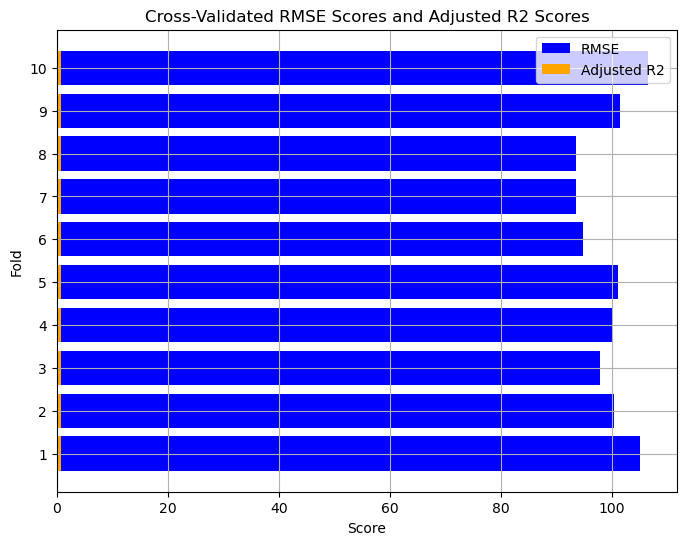

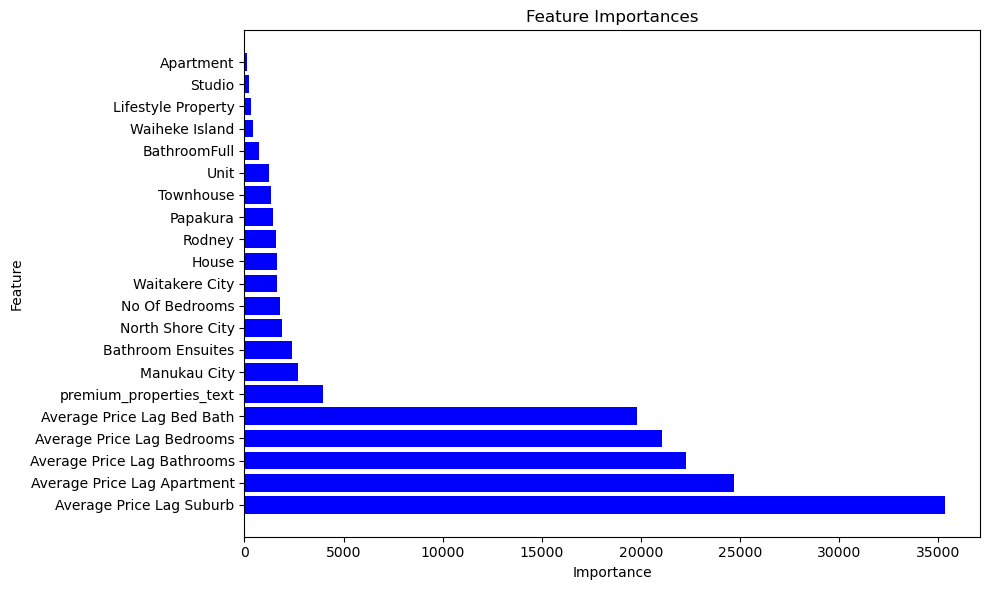

In [68]:
import lightgbm as lgb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import make_scorer, mean_squared_error, r2_score

# Create a LightGBM regressor with the best parameters based on a grid search I did in steps
model = lgb.LGBMRegressor(n_estimators=3000, subsample_for_bin=56000,
                          learning_rate=0.01, max_depth=10, num_leaves=50)

# Fit the model to the training data
model.fit(X_train, y_train)
# Predict on the test set
y_pred = model.predict(X_test)

# Calculate the RMSE on the test set
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate the adjusted R-squared on the test set
adj_r2 = 1 - (1 - r2_score(y_test, y_pred)) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

# Print the RMSE and adjusted R-squared scores on the test set
print("RMSE on test set:", rmse)
print("Adjusted R2 on test set:", adj_r2)

# Define the scoring metrics as RMSE and adjusted R-squared
scoring = {
    'RMSE': make_scorer(mean_squared_error, squared=False),
    'Adjusted R2': make_scorer(lambda y_true, y_pred: 1 - (1 - r2_score(y_true, y_pred)) * (len(y_true) - 1) / (len(y_true) - X_train.shape[1] - 1))
}

# Perform cross-validation with 10-fold and calculate RMSE and adjusted R-squared
scores = cross_validate(model, X_train, y_train, cv=10, scoring=scoring)

# Extract the RMSE scores and adjusted R-squared scores
rmse_scores = scores['test_RMSE']
adjusted_r2_scores = scores['test_Adjusted R2']

# Print the list of RMSE scores
print("RMSE Scores:", rmse_scores)

# Plot the cross-validated RMSE scores and adjusted R-squared scores on the same horizontal bar chart
plt.figure(figsize=(8, 6))
plt.barh(range(1, len(rmse_scores) + 1), rmse_scores, color='blue', label='RMSE')
plt.barh(range(1, len(adjusted_r2_scores) + 1), adjusted_r2_scores, color='orange', label='Adjusted R2')
plt.xlabel('Score')
plt.ylabel('Fold')
plt.title('Cross-Validated RMSE Scores and Adjusted R2 Scores')
plt.yticks(range(1, len(rmse_scores) + 1))
plt.legend()
plt.grid(True)
plt.show()

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame with feature names and importances
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# Sort the features by importance in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='blue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()


#cross validation not valid here because of time element and lag features



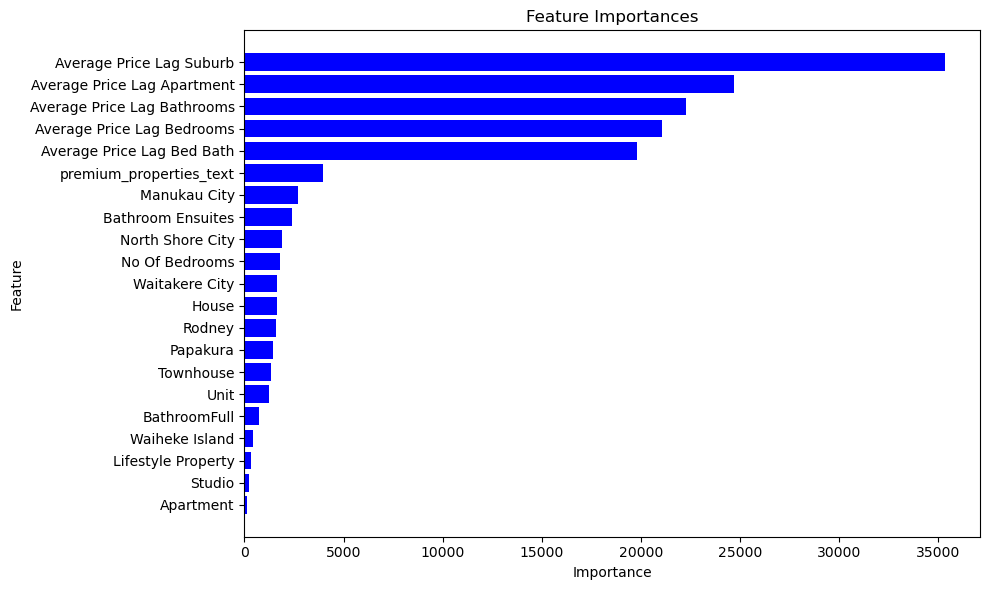

In [69]:
# fix the graph so the best features are at the top

importances = model.feature_importances_

# Create a DataFrame with feature names and importances
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# Sort the features by importance in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Reverse the order to plot from most important at the top to least at the bottom
feature_importances = feature_importances.iloc[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='blue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

# Implementing confidence intervals

RMSE on test set: 100.99444493676855
Adjusted R2 on test set: 0.7215663931170448


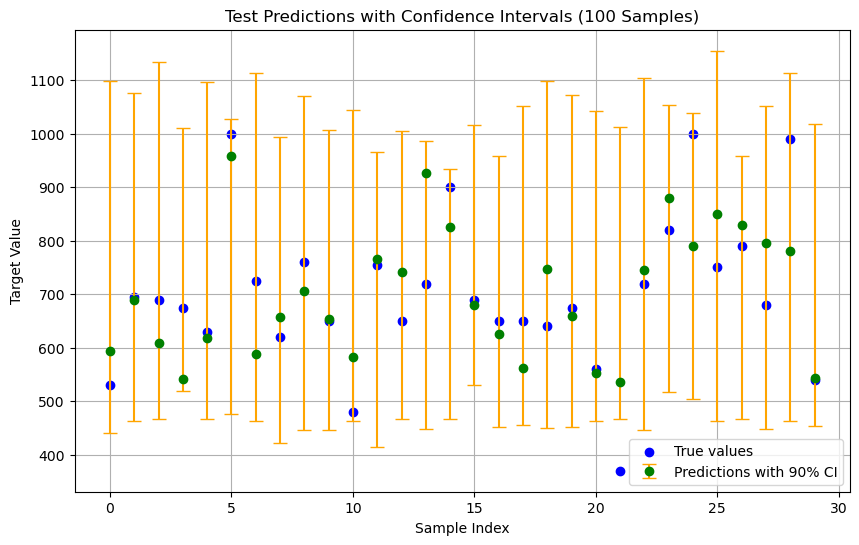

In [70]:
# Bootstrapping to calculate confidence intervals for test set predictions
def bootstrapped_ci_test(model, X, n_bootstraps=100, alpha=0.1):
    n_samples, n_features = X.shape
    y_pred_bootstrapped = np.zeros((n_bootstraps, n_samples))

    for i in range(n_bootstraps):
        sample_indices = np.random.choice(n_samples, n_samples, replace=True)
        X_bootstrap = X.iloc[sample_indices]
        y_pred_bootstrapped[i] = model.predict(X_bootstrap)

    sorted_y_pred_bootstrapped = np.sort(y_pred_bootstrapped, axis=0)
    lower_ci = sorted_y_pred_bootstrapped[int((alpha/2) * n_bootstraps)]
    upper_ci = sorted_y_pred_bootstrapped[int((1 - alpha/2) * n_bootstraps)]

    return lower_ci, upper_ci

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate confidence intervals for the test predictions
lower_ci_test, upper_ci_test = bootstrapped_ci_test(model, X_test)

# Calculate the RMSE on the test set
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate the adjusted R-squared on the test set
adj_r2 = 1 - (1 - r2_score(y_test, y_pred)) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

# Print the RMSE and adjusted R-squared scores on the test set
print("RMSE on test set:", rmse)
print("Adjusted R2 on test set:", adj_r2)

# Reduce the number of test set predictions to 100 for visualization
random_indices = np.random.choice(len(y_test), 30, replace=False)

# Calculate absolute differences for error bars
lower_error = np.abs(y_pred[random_indices] - lower_ci_test[random_indices])
upper_error = np.abs(upper_ci_test[random_indices] - y_pred[random_indices])

# Plot the test set predictions and confidence intervals using error bars
plt.figure(figsize=(10, 6))
plt.errorbar(range(len(random_indices)), y_pred[random_indices], yerr=[lower_error, upper_error],
             fmt='o', color='green', ecolor='orange', capsize=5, label='Predictions with 90% CI')
plt.scatter(range(len(random_indices)), y_test.iloc[random_indices], color='blue', label='True values')
plt.xlabel('Sample Index')
plt.ylabel('Target Value')
plt.title('Test Predictions with Confidence Intervals (100 Samples)')
plt.legend()
plt.grid(True)
plt.show()


# exploring variance in the data to explain large confidence intervals

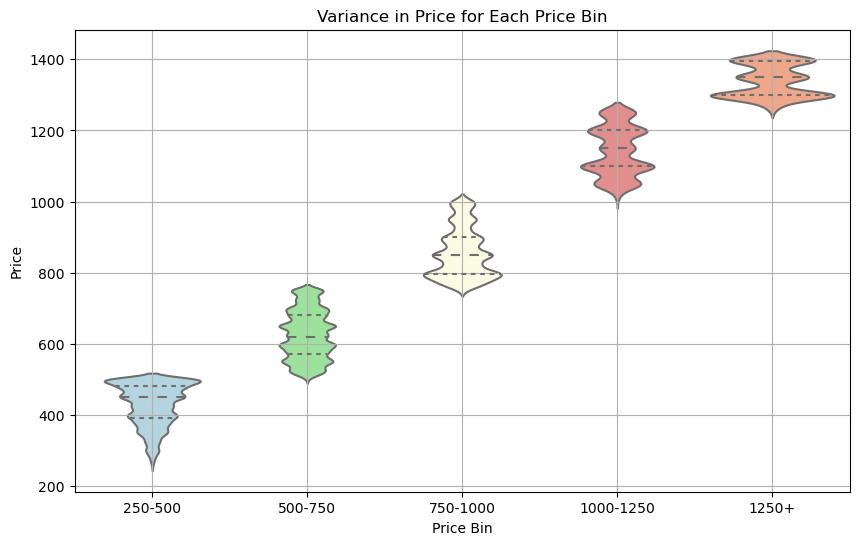

In [72]:

# Creating price bins
bins = [250, 500, 750, 1000, 1250, np.inf]
bin_labels = ['250-500', '500-750', '750-1000', '1000-1250', '1250+']

# Assign each price to a bin
filtered_df['Price Bin'] = pd.cut(filtered_df['Price'], bins=bins, labels=bin_labels)

# Define custom colors for the violin plot
custom_colors = ['lightblue', 'lightgreen', 'lightyellow', 'lightcoral', 'lightsalmon']

# Plot violin plots to show variance in price for each bin with custom colors
plt.figure(figsize=(10, 6))
sns.violinplot(x='Price Bin', y='Price', data=filtered_df, inner='quart', palette=custom_colors, linewidth=1.5)
plt.xlabel('Price Bin')
plt.ylabel('Price')
plt.title('Variance in Price for Each Price Bin')
plt.grid(True)
plt.show()


# further model evaluation

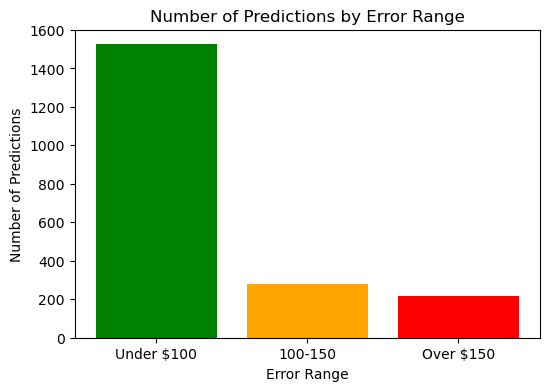

In [75]:

# Calculate the error between the actual and predicted prices
df_results['error'] = df_results['prediction'] - df_results['actual']

# Count the number of predictions with errors under 100, between 100 and 150, and over 150
count_under_100 = sum(abs(error) < 100 for error in df_results['error'])
count_100_to_150 = sum(100 <= abs(error) < 150 for error in df_results['error'])
count_over_150 = sum(abs(error) >= 150 for error in df_results['error'])

# Create a bar chart of the counts
labels = ['Under $100', '100-150', 'Over $150']
counts = [count_under_100, count_100_to_150, count_over_150]

plt.figure(figsize=(6, 4))
plt.bar(labels, counts, color=['green', 'orange', 'red'])
plt.xlabel('Error Range')
plt.ylabel('Number of Predictions')
plt.title('Number of Predictions by Error Range')
plt.show()


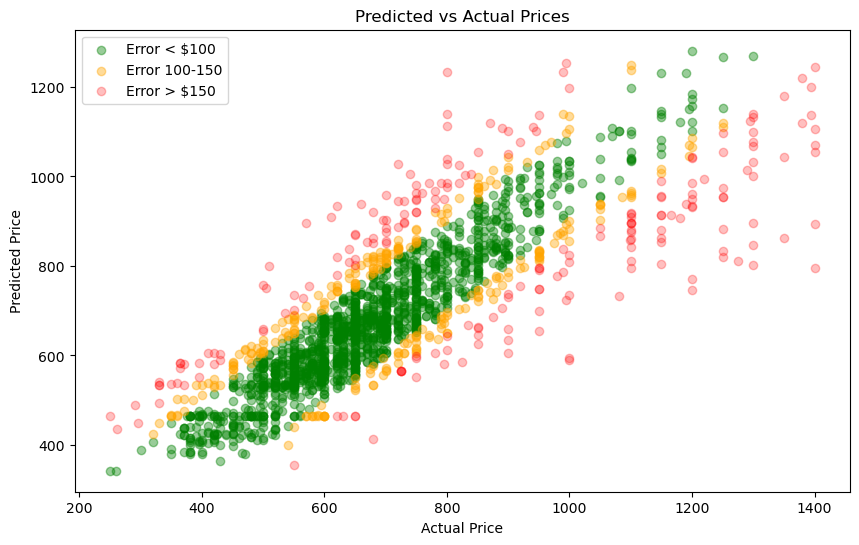

In [80]:

# Calculate the error between the actual and predicted prices
df_results['error'] = df_results['prediction'] - df_results['actual']

# Create a new column indicating the error range
df_results['error_range'] = ['Under $100' if abs(error) < 100 else '100-150' if 100 <= abs(error) < 150 else 'Over $150' for error in df_results['error']]

# Separate the data into three groups based on the error range
under_100 = df_results[df_results['error_range'] == 'Under $100']
between_100_150 = df_results[df_results['error_range'] == '100-150']
over_150 = df_results[df_results['error_range'] == 'Over $150']

# Create a scatter plot of predicted vs actual prices
plt.figure(figsize=(10, 6))
plt.scatter(under_100['actual'], under_100['prediction'], color='green', label='Error < $100', alpha=0.4)
plt.scatter(between_100_150['actual'], between_100_150['prediction'], color='orange', label='Error 100-150', alpha=0.4)
plt.scatter(over_150['actual'], over_150['prediction'], color='red', label='Error > $150', alpha=0.25)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Predicted vs Actual Prices')
plt.legend()
plt.show()


# app.py and streamlit code

In [ ]:
import streamlit as st
import pandas as pd
import numpy as np
import joblib
import lightgbm as lgb
from scipy.stats import norm
import logging



# Configure logging to print debug messages
logging.basicConfig(level=logging.DEBUG)

# Load the saved model
model = joblib.load('/Users/lou/Desktop/Streamlit_app/saved_model2.joblib')

# Load the dataset
df = pd.read_csv('/Users/lou/Desktop/projects/Capstone/capstone data/Lukas Starkey data.csv')

# Convert 'Publish Date' column to datetime format
df['Publish Date'] = pd.to_datetime(df['Publish Date'], format='%d/%m/%Y')

# Create a new column 'Apartment' based on 'Listing Subtype'
df['Apartment'] = df['Listing Subtype'] == 'Apartment'

# Get the unique suburbs from the 'Suburb' column
unique_suburbs = df['Suburb'].unique()

# Drop all other unnecessary columns from the DataFrame
df = df[['Suburb', 'Price', 'No Of Bedrooms', 'BathroomFull', 'Listing Subtype', 'Apartment', 'Publish Date']]

# Drop rows with null values
df.dropna(inplace=True)

# Preprocessing functions

def preprocess_average_price_lag_by_suburb(df, suburb):
    
    # Filter the dataframe based on the user input for suburb
    filtered_df = df[df['Suburb'] == suburb]

    # Calculate the average price for the suburb and three-month window
    filtered_df['Average Price Suburb'] = filtered_df.groupby(pd.Grouper(key='Publish Date', freq='3M'))['Price'].transform('median')

    # Shift the average price by one row to exclude the current listing
    filtered_df['Average Price Lag By Suburb'] = filtered_df['Average Price Suburb'].shift()

    # Replace missing values with the next available value
    filtered_df['Average Price Lag By Suburb'].fillna(method='bfill', inplace=True)

    return filtered_df['Average Price Lag By Suburb'].iloc[0]


def preprocess_average_price_lag_bedrooms(df, bedrooms):
    
    # Filter the dataframe based on the user input for bedrooms
    filtered_df = df[df['No Of Bedrooms'] == bedrooms]

    # Calculate the average price lag
    filtered_df['Average Price Bedrooms'] = filtered_df.groupby([pd.Grouper(key='Publish Date', freq='3M')])['Price'].transform('mean')
    filtered_df['Average Price Lag Bedrooms'] = filtered_df['Average Price Bedrooms'].shift()

    # Replace missing values with the next available value
    filtered_df['Average Price Lag Bedrooms'].fillna(method='bfill', inplace=True)

    return filtered_df['Average Price Lag Bedrooms'].iloc[0]



def preprocess_average_price_lag_bathroomfull(df, bathroom_full):
    
    # Filter the dataframe based on the user input for BathroomFull
    filtered_df = df[df['BathroomFull'] == bathroom_full]

    # Calculate the average price lag
    filtered_df['Average Price BathroomFull'] = filtered_df.groupby([pd.Grouper(key='Publish Date', freq='3M')])['Price'].transform('mean')
    filtered_df['Average Price Lag BathroomFull'] = filtered_df['Average Price BathroomFull'].shift()

    # Replace missing values with the next available value
    filtered_df['Average Price Lag BathroomFull'].fillna(method='bfill', inplace=True)

    return filtered_df['Average Price Lag BathroomFull'].iloc[0]

def preprocess_average_price_lag_apartment(df, apartment):
    
    # Convert apartment to integer (0 for False, 1 for True)
    is_apartment = 1 if apartment else 0

    # Filter the dataframe based on the user input for apartment
    filtered_df = df[df['Apartment'] == is_apartment]

    # Calculate the average price lag
    filtered_df['Average Price Apartment'] = filtered_df.groupby([pd.Grouper(key='Publish Date', freq='3M')])['Price'].transform('mean')
    filtered_df['Average Price Lag Apartment'] = filtered_df['Average Price Apartment'].shift()

    # Replace missing values with the next available value
    filtered_df['Average Price Lag Apartment'].fillna(method='bfill', inplace=True)

    return filtered_df['Average Price Lag Apartment'].iloc[0]




# Define the Streamlit app
def main():
    st.title('Auckland Rental Price Prediction Prototype')

    
    # Define the input fields
    suburb = st.selectbox('Suburb', unique_suburbs)
    
    # Bathroom Ensuites input
    bathroom_ensuites = st.number_input('Number of bathroom ensuites', min_value=0, max_value=10, value=0)
    
    # Bathroom Full input
    bathroom_full = st.number_input('Number of full bathrooms', min_value=1, max_value=10, value=1)
    
    # No Of Bedrooms input
    bedrooms = st.number_input('Number of bedrooms', min_value=1, max_value=10, value=1)
    
    # Apartment input
    apartment = st.selectbox('Apartment', [True, False])

    # Logging the values of suburb, bedrooms, bathroom_full, and apartment
    logging.debug("Suburb: %s", suburb)
    logging.debug("Bedrooms: %s, Bathrooms: %s", bedrooms, bathroom_full)
    logging.debug("Apartment: %s, Bedrooms: %s", apartment, bedrooms)

    if st.button('Make Prediction'):
        # Preprocess 'Average Price Lag By Suburb'
        average_price_lag_by_suburb = preprocess_average_price_lag_by_suburb(df, suburb)

        # Preprocess 'Average Price Lag Bedrooms'
        average_price_lag_bedrooms = preprocess_average_price_lag_bedrooms(df, bedrooms)

        # Preprocess 'Average Price Lag BathroomFull'
        average_price_lag_bathroomfull = preprocess_average_price_lag_bathroomfull(df, bathroom_full)

        # Preprocess 'Average Price Lag Apartment'
        average_price_lag_apartment = preprocess_average_price_lag_apartment(df, apartment)

       # Generate a prediction using the loaded model
        input_data = {
            'Bathroom Ensuites': [bathroom_ensuites],
            'Bathroom Full': [bathroom_full],
            'No Of Bedrooms': [bedrooms],
            'Average Price Lag Bedrooms': [average_price_lag_bedrooms],
            'Average Price Lag By Suburb': [average_price_lag_by_suburb],
            'Average Price Lag Apartment': [average_price_lag_apartment],
            'Average Price Lag BathroomFull': [average_price_lag_bathroomfull]
        }

        # Convert input_data to DataFrame and ensure all columns are numeric
        input_df = pd.DataFrame(input_data)
        input_df = input_df.apply(pd.to_numeric, errors='coerce')
  
        # Drop rows with any NaN values
        input_df.dropna(inplace=True)

        if input_df.empty:
            st.write("Input data is empty. Please check your inputs.")
            return  # Return early to avoid further processing
        else:
            # Ensure the input data is 2-dimensional
            input_data_2d = input_df.values

            # Generate a prediction using the loaded model
            prediction = model.predict(input_data_2d)[0]

           # Post-processing: Round the prediction to the nearest 10 and calculate the range
        rounded_prediction = round(prediction / 10) * 10
        lower_bound = rounded_prediction - 50
        upper_bound = rounded_prediction + 50

        # Format the lower and upper bounds with the dollar sign and thousands separators
        formatted_lower_bound = "${:,.0f}".format(lower_bound)
        formatted_upper_bound = "${:,.0f}".format(upper_bound)

        # Display the prediction range 
        st.write('Predicted rental price range:', '$',formatted_lower_bound, '-', '$',formatted_upper_bound)

        if apartment:
            st.code(
                "............................................     ^                   "
                "   ^     ^  ^        _|__|__|_           ^   ^\n"
                "     ___________    _|  | |  |_    ___________   ^\n"
                "    (__IXIXIXIXI___|_|__|_|__|_|___IXIXIXIXI__)\n"
                "    (__|\"|\"|\"|\"| [=][=] [=] [=][=] |\"|\"|\"|__)\n"
                "    (__|\"|\"|\"|\"| [=][=] [=] [=][=] |\"|\"|\"|__)\n"
                "    (__|\"|\"|\"|\"| [=][=] [=] [=][=] |\"|\"|\"|__)\n"
                "    (__|\"|\"|\"|\"| [=][=] [=] [=][=] |\"|\"|\"|__)\n"
                "    (__|\"|\"|\"|\"| [=][=] [=] [=][=] |\"|\"|\"|__)\n"
                "  /)(__|\"|\"|\"|\"| [=][=] [=] [=][=] |\"|\"|\"|__)\n"
                "_/ )(__|\"|\"|\"|\"| [=][=] [=] [=][=] |\"|\"|\"|__)_/)_\n"
                " ~^^(__|\"|\"|\"|\"| [=][=] [=] [=][=] |\"|\"|\"|__) ~~^\n"
                "^~~ (__|\"|\"|\"|\"| [=][=] [=] [=][=] |\"|\"|\"|__)~~^\n"
                "\"\"\"\"\"IXI~IXI~IXI~IXI~=I=I=I=I=~IXI~IXI~IXI~IXI\"\"\"\"\"\n"
                "     \"\"\"\"\"\"\"\"\"\"\"\"\"\"\"\"\"|   |\"\"\"\"\"\"\"\"\"\"\"\"\"\"\"\"\""
            )
        else:
            st.code(
                "         _ _\n"
                "        ( Y )\n"
                "         \\ /\n"
                "          \\         /^\\\n"  
                "            )       //^\\\n"
                "         (         //   \\\n"
                "           )      //     \\\n"
                "          __     //       \\\n"
                "         |=^|   //    _    \\\n"
                "       __|= |__//    (+)    \\\n"
                "      /LLLLLLL//      ~      \\\n"
                "     /LLLLLLL//               \\\n"
                "    /LLLLLLL//                 \\\n"
                "   /LLLLLLL//  |~[|]~| |~[|]~|  \\\n"
                "   ^| [|] //   | [|] | | [|] |   \\\n"
                "    | [|] ^|   |_[|]_| |_[|]_|   |^\n"
                " ___|______|                     |\n"
                "/LLLLLLLLLL|_____________________|\n"
                "/LLLLLLLLLLL/LLLLLLLLLLLLLLLLLLLLLL\\\n"
                "/LLLLLLLLLLL/LLLLLLLLLLLLLLLLLLLLLLLL\\\n"
                "^||^^^^^^^^/LLLLLLLLLLLLLLLLLLLLLLLLLL\\\n"
                " || |~[|]~|^^||^^^^^^^^^^||^|~[|]~|^||^^\n"
                " || | [|] |  ||  |~~~~|  || | [|] | ||\n"
                " || |_[|]_|  ||  | [] |  || |_[|]_| ||\n"
                " ||__________||  |   o|  ||_________||\n"
                ".'||][][][][][|| | [] |  ||[][][][][||.'.\n"
                ".'||[][][][][]||_-`----'-_||][][][][]||'.\"\n"
                ".'(')^(.)(').( )'^@/-- -- - --\\@( )'(.),( ).(').\n"
            )


if __name__ == '__main__':
    main()

